<a href="https://colab.research.google.com/github/haduycattuong/DataMining-LayoffsDataset/blob/main/Layoffs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Layoffs/Layoffs Dataset 2023/layoffs_data.csv')
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2738 entries, 0 to 2737
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Company                     2738 non-null   object 
 1   Location_HQ                 2738 non-null   object 
 2   Industry                    2738 non-null   object 
 3   Percentage                  1819 non-null   float64
 4   Date                        2738 non-null   object 
 5   Source                      2738 non-null   object 
 6   Funds_Raised                2466 non-null   float64
 7   Stage                       2738 non-null   object 
 8   Date_Added                  2738 non-null   object 
 9   Country                     2738 non-null   object 
 10  Laid_Off_Count              1871 non-null   float64
 11  List_of_Employees_Laid_Off  2737 non-null   object 
dtypes: float64(3), object(9)
memory usage: 256.8+ KB


In [70]:
def get_date():
    year_list = []

    col = df['Date_Added']
    for i in range(len(col)):
        date = col[i]
        year = col[i].split("-", 1)[0]
        year_list.append(year)
        # break
    return year_list

layoff_year_list = get_date()

In [71]:
df['Year'] = layoff_year_list

In [72]:
df.drop(['Source', 'Date_Added', 'List_of_Employees_Laid_Off', 'Location_HQ', 'Date'], axis = 1, inplace = True)

In [73]:
df1 = df[(df['Laid_Off_Count'].notna()) & (df['Percentage'].notna())].dropna()
df1

,Company,Industry,Percentage,Funds_Raised,Stage,Country,Laid_Off_Count,Year
5,Ritual,Food,0.40,134.0,Series C,Canada,38.0,2023
7,Grab,Transportation,0.11,16500.0,Post-IPO,Singapore,1000.0,2023
10,Chigari,Media,0.20,88.0,Unknown,India,48.0,2023
13,Mojocare,Healthcare,0.80,24.0,Series A,India,170.0,2023
17,CareRev,Healthcare,0.33,51.0,Series A,United States,100.0,2023
...,...,...,...,...,...,...,...,...
2731,Inspirato,Travel,0.22,79.0,Series C,United States,130.0,2020
2732,Help.com,Support,1.00,6.0,Seed,United States,16.0,2020
2734,HopSkipDrive,Transportation,0.10,45.0,Unknown,United States,8.0,2020
2735,Panda Squad,Consumer,0.75,1.0,Seed,United States,6.0,2020


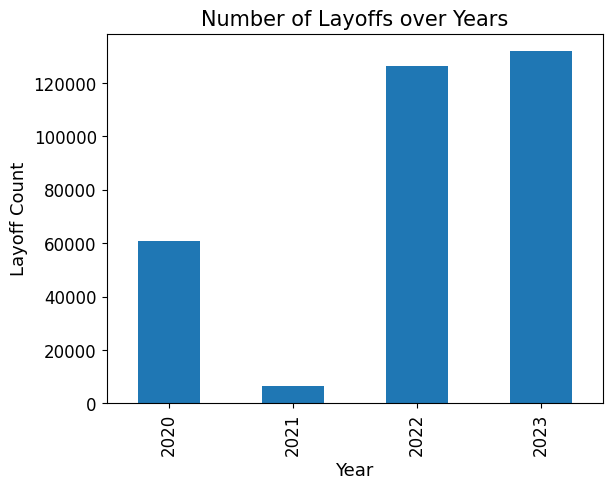

In [74]:
df1.groupby('Year')['Laid_Off_Count'].sum().plot(kind='bar',fontsize=12)
plt.title('Number of Layoffs over Years',size=15)
plt.xlabel('Year',size=13)
plt.ylabel('Layoff Count',size=13);

In [ ]:
df1.groupby('Country')['Laid_Off_Count'].sum().sort_values(ascending=False)


In [ ]:
df1.groupby('Industry')['Laid_Off_Count'].sum().sort_values(ascending=False)

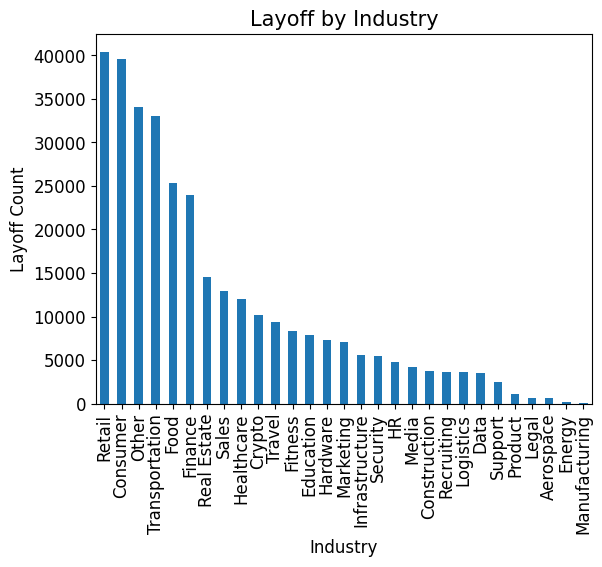

In [75]:
df1.groupby('Industry')['Laid_Off_Count'].sum().sort_values(ascending=False).plot(kind='bar',fontsize=12)
plt.title('Layoff by Industry',size=15)
plt.xlabel('Industry',size=12)
plt.ylabel('Layoff Count',size=12);

In [ ]:
df1.groupby('Industry')['Percentage'].mean().sort_values(ascending=False).round(3)

In [ ]:
#plot it with bar chart
df1.groupby('Industry')['Percentage'].mean().sort_values(ascending=False).round(3).plot(kind='bar', fontsize=12)
plt.title(' Average Percentage of Layoff by Industry',size=15)
plt.xlabel('Industry',size=12)
plt.ylabel('Layoff Average Percentage',size=12);

In [ ]:
df1.groupby('Stage')['Laid_Off_Count'].sum().sort_values(ascending=False).round(3)

In [ ]:
df1.groupby('Stage')['Laid_Off_Count'].sum().sort_values(ascending=False).plot(kind='bar',fontsize=12)
plt.title('Layoff by Stage',size=15)
plt.xlabel('Stage',size=12)
plt.ylabel('Layoff Count',size=12)

In [76]:
df2 = df1.copy()
df2

,Company,Industry,Percentage,Funds_Raised,Stage,Country,Laid_Off_Count,Year
5,Ritual,Food,0.40,134.0,Series C,Canada,38.0,2023
7,Grab,Transportation,0.11,16500.0,Post-IPO,Singapore,1000.0,2023
10,Chigari,Media,0.20,88.0,Unknown,India,48.0,2023
13,Mojocare,Healthcare,0.80,24.0,Series A,India,170.0,2023
17,CareRev,Healthcare,0.33,51.0,Series A,United States,100.0,2023
...,...,...,...,...,...,...,...,...
2731,Inspirato,Travel,0.22,79.0,Series C,United States,130.0,2020
2732,Help.com,Support,1.00,6.0,Seed,United States,16.0,2020
2734,HopSkipDrive,Transportation,0.10,45.0,Unknown,United States,8.0,2020
2735,Panda Squad,Consumer,0.75,1.0,Seed,United States,6.0,2020


In [ ]:
#min_funds_raised = df1['Funds_Raised'].min()
#max_funds_raised = df1['Funds_Raised'].max()
#df2['Funds_Raised'] = ((df1[['Funds_Raised']] - min_funds_raised)) / (max_funds_raised - min_funds_raised).round(3)
#df2.head()

,Percentage,Funds_Raised,Laid_Off_Count
count,1367.000000,1243.000000,1367.000000
mean,0.223729,0.006540,278.271397
std,0.209568,0.043104,875.024322
min,0.000000,0.000000,3.000000
25%,0.100000,0.000509,40.000000
50%,0.160000,0.001460,84.000000
75%,0.280000,0.003942,200.000000
max,1.000000,1.000000,12000.000000


In [ ]:
#min_laid_off_count = df1['Laid_Off_Count'].min()
#max_laid_off_count = df1['Laid_Off_Count'].max()
#df2['Laid_Off_Count'] = ((df1[['Laid_Off_Count']] - min_laid_off_count)) / (max_laid_off_count - min_laid_off_count).round(3)
#df2.head()

,Percentage,Funds_Raised,Laid_Off_Count
count,1367.000000,1243.000000,1367.000000
mean,0.223729,0.006540,0.022945
std,0.209568,0.043104,0.072937
min,0.000000,0.000000,0.000000
25%,0.100000,0.000509,0.003084
50%,0.160000,0.001460,0.006752
75%,0.280000,0.003942,0.016421
max,1.000000,1.000000,1.000000


In [ ]:
#min_percentage = df1['Percentage'].min()
#max_percentage = df1['Percentage'].max()
#df2['Percentage'] = ((df1[['Percentage']] - min_percentage)) / (max_percentage - min_percentage).round(3)
#df2.head()

In [77]:
df1['Stage_New'] = ""
df1.loc[df1['Stage'].str.contains("Post-IPO"), 'Stage_New'] = "0"
df1.loc[df1['Stage_New'] == "", 'Stage_New'] = "1"

df2['Stage'] = df1['Stage_New']
df2.head()

,Company,Industry,Percentage,Funds_Raised,Stage,Country,Laid_Off_Count,Year
5,Ritual,Food,0.40,134.0,1,Canada,38.0,2023
7,Grab,Transportation,0.11,16500.0,0,Singapore,1000.0,2023
10,Chigari,Media,0.20,88.0,1,India,48.0,2023
13,Mojocare,Healthcare,0.80,24.0,1,India,170.0,2023
17,CareRev,Healthcare,0.33,51.0,1,United States,100.0,2023


In [78]:
df1['Country_New'] = ""
df1.loc[df1['Country'].str.contains("United States"), 'Country_New'] = "0"
df1.loc[df1['Country_New'] == "", 'Country_New'] = "1"

df2['Country'] = df1['Country_New']
df2.to_csv('/content/drive/MyDrive/Colab Notebooks/Layoffs/Layoffs_Cleaned.csv')
df2.head()

,Company,Industry,Percentage,Funds_Raised,Stage,Country,Laid_Off_Count,Year
5,Ritual,Food,0.40,134.0,1,1,38.0,2023
7,Grab,Transportation,0.11,16500.0,0,1,1000.0,2023
10,Chigari,Media,0.20,88.0,1,1,48.0,2023
13,Mojocare,Healthcare,0.80,24.0,1,1,170.0,2023
17,CareRev,Healthcare,0.33,51.0,1,0,100.0,2023


In [ ]:
#frequency_table_industry = df1['Industry'].value_counts().sort_index().reset_index()
#frequency_table_industry.columns = ['Industry', 'Industry_freq']

#min_frequency_table_industry = frequency_table_industry['Industry_freq'].min()
#max_frequency_table_industry = frequency_table_industry['Industry_freq'].max()

#frequency_table_industry['Industry_freq'] = frequency_table_industry['Industry_freq'].apply(lambda x: (x - min_frequency_table_industry) / (max_frequency_table_industry - min_frequency_table_industry)).round(4)

#frequency_table_industry

In [ ]:
#df3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Layoffs/Layoffs_Cleaned.csv')


#df3 = df3.merge(frequency_table_industry[['Industry', 'Industry_freq']], on = 'Industry')

In [ ]:
#df1['Year_New'] = ""
#df1.loc[df1['Year'].str.contains("2020"), 'Year_New'] = "0"
#df1.loc[df1['Year'].str.contains("2021"), 'Year_New'] = "0.33"
#df1.loc[df1['Year'].str.contains("2022"), 'Year_New'] = "0.67"
#df1.loc[df1['Year_New'] == "", 'Year_New'] = "1"

#df2['Year'] = df1['Year_New']
#df2.to_csv('/content/drive/MyDrive/Colab Notebooks/Layoffs/Layoffs_Cleaned_Year.csv')
#df2.head()

#1/KNN Classification Report, Naive Bayes


In [ ]:
#df3['Industry'] = df3['Industry_freq']

#df3 = df3.drop(labels = ['Unnamed: 0', 'Industry_freq'], axis = 1)
#df3.to_csv('/content/drive/MyDrive/Colab Notebooks/Layoffs/Layoffs_Cleaned_Final.csv')


In [79]:
df4 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Layoffs/Layoffs_Cleaned.csv', index_col = 0)
df4


,Company,Industry,Percentage,Funds_Raised,Stage,Country,Laid_Off_Count,Year
5,Ritual,Food,0.40,134.0,1,1,38.0,2023
7,Grab,Transportation,0.11,16500.0,0,1,1000.0,2023
10,Chigari,Media,0.20,88.0,1,1,48.0,2023
13,Mojocare,Healthcare,0.80,24.0,1,1,170.0,2023
17,CareRev,Healthcare,0.33,51.0,1,0,100.0,2023
...,...,...,...,...,...,...,...,...
2731,Inspirato,Travel,0.22,79.0,1,0,130.0,2020
2732,Help.com,Support,1.00,6.0,1,0,16.0,2020
2734,HopSkipDrive,Transportation,0.10,45.0,1,0,8.0,2020
2735,Panda Squad,Consumer,0.75,1.0,1,0,6.0,2020


In [80]:
data = df4.dropna()
data = data.reset_index().drop('index', axis = 1)
data

,Company,Industry,Percentage,Funds_Raised,Stage,Country,Laid_Off_Count,Year
0,Ritual,Food,0.40,134.0,1,1,38.0,2023
1,Grab,Transportation,0.11,16500.0,0,1,1000.0,2023
2,Chigari,Media,0.20,88.0,1,1,48.0,2023
3,Mojocare,Healthcare,0.80,24.0,1,1,170.0,2023
4,CareRev,Healthcare,0.33,51.0,1,0,100.0,2023
...,...,...,...,...,...,...,...,...
1238,Inspirato,Travel,0.22,79.0,1,0,130.0,2020
1239,Help.com,Support,1.00,6.0,1,0,16.0,2020
1240,HopSkipDrive,Transportation,0.10,45.0,1,0,8.0,2020
1241,Panda Squad,Consumer,0.75,1.0,1,0,6.0,2020


In [81]:
data['Laid_Off_Rank'] = ""
data.loc[(data['Laid_Off_Count'] >= 250) & (data['Laid_Off_Count'] < 400), 'Laid_Off_Rank'] = "Medium"
data.loc[(data['Laid_Off_Count'] >= 400), 'Laid_Off_Rank'] = "High"
data.loc[(data['Laid_Off_Count'] < 250) , 'Laid_Off_Rank'] = "Low"
data

,Company,Industry,Percentage,Funds_Raised,Stage,Country,Laid_Off_Count,Year,Laid_Off_Rank
0,Ritual,Food,0.40,134.0,1,1,38.0,2023,Low
1,Grab,Transportation,0.11,16500.0,0,1,1000.0,2023,High
2,Chigari,Media,0.20,88.0,1,1,48.0,2023,Low
3,Mojocare,Healthcare,0.80,24.0,1,1,170.0,2023,Low
4,CareRev,Healthcare,0.33,51.0,1,0,100.0,2023,Low
...,...,...,...,...,...,...,...,...,...
1238,Inspirato,Travel,0.22,79.0,1,0,130.0,2020,Low
1239,Help.com,Support,1.00,6.0,1,0,16.0,2020,Low
1240,HopSkipDrive,Transportation,0.10,45.0,1,0,8.0,2020,Low
1241,Panda Squad,Consumer,0.75,1.0,1,0,6.0,2020,Low


In [82]:
train_df, test_df = train_test_split(data, test_size = 0.1, random_state = 42)

knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(train_df[['Percentage', 'Funds_Raised', 'Stage', 'Country', 'Laid_Off_Count', 'Year']], train_df['Laid_Off_Rank'])

knn_predictions = knn_model.predict(test_df[['Percentage', 'Funds_Raised', 'Stage', 'Country', 'Laid_Off_Count', 'Year']])

print("KNN Classification Report: ")
print(classification_report(test_df['Laid_Off_Rank'], knn_predictions))

KNN Classification Report: 
              precision    recall  f1-score   support

        High       0.92      0.86      0.89        14
         Low       0.98      1.00      0.99        99
      Medium       0.82      0.75      0.78        12

    accuracy                           0.96       125
   macro avg       0.91      0.87      0.89       125
weighted avg       0.96      0.96      0.96       125



In [83]:
nb_model = GaussianNB()
nb_model.fit(train_df[['Percentage', 'Funds_Raised', 'Stage', 'Country', 'Laid_Off_Count', 'Year']], train_df['Laid_Off_Rank'])

nb_predictions = nb_model.predict(test_df[['Percentage', 'Funds_Raised', 'Stage', 'Country', 'Laid_Off_Count', 'Year']])
print("Naive_Bayes Classification Report: ")
print(classification_report(test_df['Laid_Off_Rank'], nb_predictions))

Naive_Bayes Classification Report: 
              precision    recall  f1-score   support

        High       1.00      1.00      1.00        14
         Low       1.00      1.00      1.00        99
      Medium       1.00      1.00      1.00        12

    accuracy                           1.00       125
   macro avg       1.00      1.00      1.00       125
weighted avg       1.00      1.00      1.00       125



In [84]:
#Xuất ra file Layoffs_Final_Rank để làm KMeans
data.to_csv('/content/drive/MyDrive/Colab Notebooks/Layoffs/Layoffs_Final_Rank.csv')
data

,Company,Industry,Percentage,Funds_Raised,Stage,Country,Laid_Off_Count,Year,Laid_Off_Rank
0,Ritual,Food,0.40,134.0,1,1,38.0,2023,Low
1,Grab,Transportation,0.11,16500.0,0,1,1000.0,2023,High
2,Chigari,Media,0.20,88.0,1,1,48.0,2023,Low
3,Mojocare,Healthcare,0.80,24.0,1,1,170.0,2023,Low
4,CareRev,Healthcare,0.33,51.0,1,0,100.0,2023,Low
...,...,...,...,...,...,...,...,...,...
1238,Inspirato,Travel,0.22,79.0,1,0,130.0,2020,Low
1239,Help.com,Support,1.00,6.0,1,0,16.0,2020,Low
1240,HopSkipDrive,Transportation,0.10,45.0,1,0,8.0,2020,Low
1241,Panda Squad,Consumer,0.75,1.0,1,0,6.0,2020,Low


In [85]:
data_kmeans = data.dropna()
data_kmeans

,Company,Industry,Percentage,Funds_Raised,Stage,Country,Laid_Off_Count,Year,Laid_Off_Rank
0,Ritual,Food,0.40,134.0,1,1,38.0,2023,Low
1,Grab,Transportation,0.11,16500.0,0,1,1000.0,2023,High
2,Chigari,Media,0.20,88.0,1,1,48.0,2023,Low
3,Mojocare,Healthcare,0.80,24.0,1,1,170.0,2023,Low
4,CareRev,Healthcare,0.33,51.0,1,0,100.0,2023,Low
...,...,...,...,...,...,...,...,...,...
1238,Inspirato,Travel,0.22,79.0,1,0,130.0,2020,Low
1239,Help.com,Support,1.00,6.0,1,0,16.0,2020,Low
1240,HopSkipDrive,Transportation,0.10,45.0,1,0,8.0,2020,Low
1241,Panda Squad,Consumer,0.75,1.0,1,0,6.0,2020,Low


#2/KMeans


In [86]:
data['Rank_New'] = ""
data.loc[data['Laid_Off_Rank'].str.contains("Low"), 'Rank_New'] = "0"
data.loc[data['Laid_Off_Rank'].str.contains("Medium"), 'Rank_New'] = "0.5"
data.loc[data['Laid_Off_Rank'].str.contains("High"), 'Rank_New'] = "1"
data_kmeans['Laid_Off_Rank'] = data['Rank_New']
data_kmeans.to_csv('/content/drive/MyDrive/Colab Notebooks/Layoffs/Layoffs_Final_Kmeans.csv')
data_kmeans.head()

,Company,Industry,Percentage,Funds_Raised,Stage,Country,Laid_Off_Count,Year,Laid_Off_Rank
0,Ritual,Food,0.40,134.0,1,1,38.0,2023,0
1,Grab,Transportation,0.11,16500.0,0,1,1000.0,2023,1
2,Chigari,Media,0.20,88.0,1,1,48.0,2023,0
3,Mojocare,Healthcare,0.80,24.0,1,1,170.0,2023,0
4,CareRev,Healthcare,0.33,51.0,1,0,100.0,2023,0


In [87]:
#tach thanh 2 tap tin train va test
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(data_kmeans, test_size = 0.1, random_state = 42)
#data_train = data_kmeans.iloc[:-50]
#data_test = data_kmeans.iloc[-50:]
data_train.to_csv('/content/drive/MyDrive/Colab Notebooks/Layoffs/Layoffs_Kmeans_Train.csv',index=False)
data_test.to_csv('/content/drive/MyDrive/Colab Notebooks/Layoffs/Layoffs_Kmeans_Test.csv',index=False)


In [88]:
from sklearn.cluster import KMeans
#loai bo company va industry
X_train = data_train.drop(labels = ['Company', 'Industry'], axis = 1)
#thuc hien gom cum Kmean cho tap train voi k=2 k=3 k=4, k=5, k=6
kmeans2 = KMeans(n_clusters=2,random_state=0).fit(X_train)
kmeans3 = KMeans(n_clusters=3,random_state=0).fit(X_train)
kmeans4 = KMeans(n_clusters=4,random_state=0).fit(X_train)
kmeans5 = KMeans(n_clusters=5,random_state=0).fit(X_train)
kmeans6 = KMeans(n_clusters=6,random_state=0).fit(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

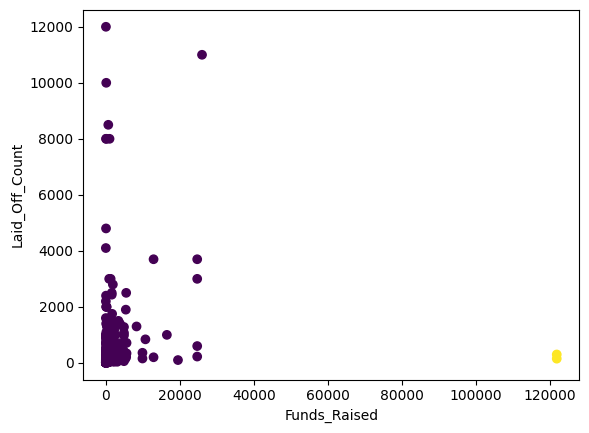

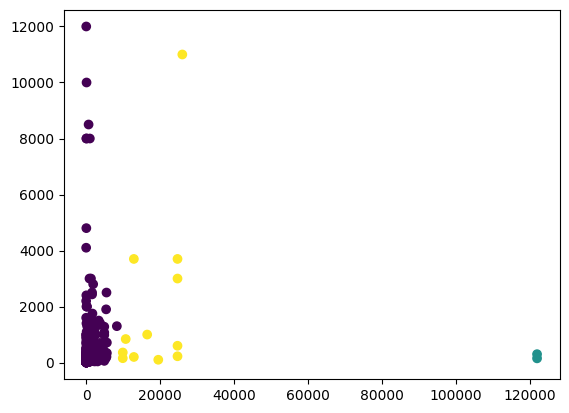

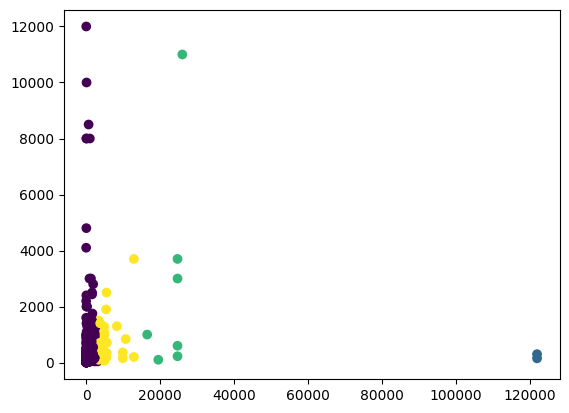

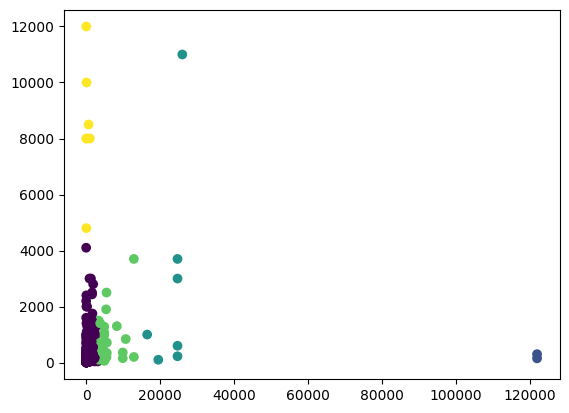

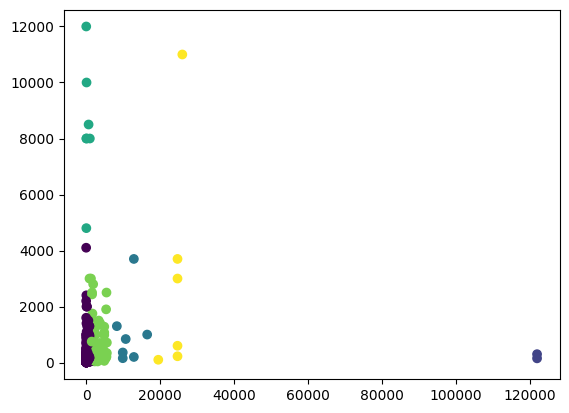

In [89]:
#fit model Kmeans voi du lieu da duoc chuan hoa:
X_train = data_train.drop(labels = ['Company', 'Industry'], axis = 1)
y_pred_2 = kmeans2.predict(X_train)
y_pred_3 = kmeans3.predict(X_train)
y_pred_4 = kmeans4.predict(X_train)
y_pred_5 = kmeans5.predict(X_train)
y_pred_6 = kmeans6.predict(X_train)

import matplotlib.pyplot as plt
plt.xlabel('Funds_Raised')
plt.ylabel('Laid_Off_Count')
plt.scatter(X_train['Funds_Raised'],X_train['Laid_Off_Count'],c=y_pred_2)
plt.show()
plt.scatter(X_train['Funds_Raised'],X_train['Laid_Off_Count'],c=y_pred_3)
plt.show()
plt.scatter(X_train['Funds_Raised'],X_train['Laid_Off_Count'],c=y_pred_4)
plt.show()
plt.scatter(X_train['Funds_Raised'],X_train['Laid_Off_Count'],c=y_pred_5)
plt.show()
plt.scatter(X_train['Funds_Raised'],X_train['Laid_Off_Count'],c=y_pred_6)
plt.show()

In [96]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_train['Laid_Off_Rank'] = le.fit_transform(data_train['Laid_Off_Rank'])
y_true = data_train['Laid_Off_Rank']
#0: Low, 1: Medium, 2: High
print(confusion_matrix(y_true, y_pred_3))
print(classification_report(y_true, y_pred_3))

[[891   1   4]
 [ 83   1   1]
 [130   0   7]]
              precision    recall  f1-score   support

           0       0.81      0.99      0.89       896
           1       0.50      0.01      0.02        85
           2       0.58      0.05      0.09       137

    accuracy                           0.80      1118
   macro avg       0.63      0.35      0.34      1118
weighted avg       0.76      0.80      0.73      1118



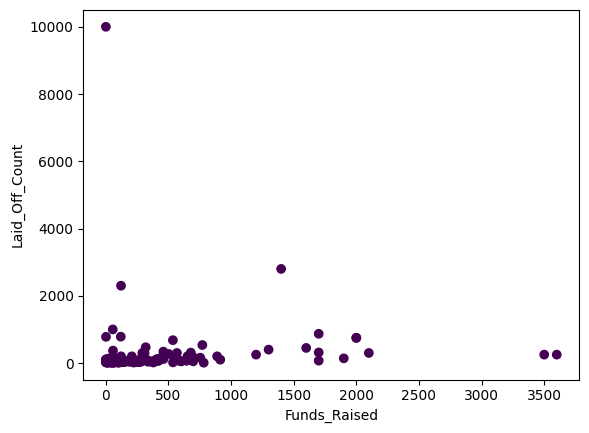

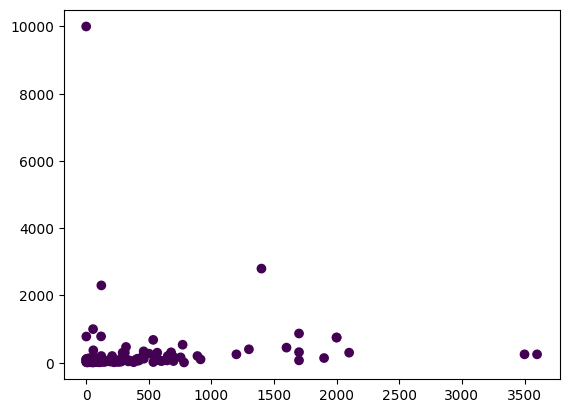

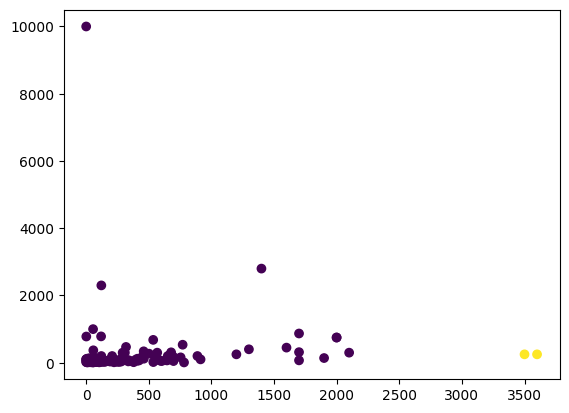

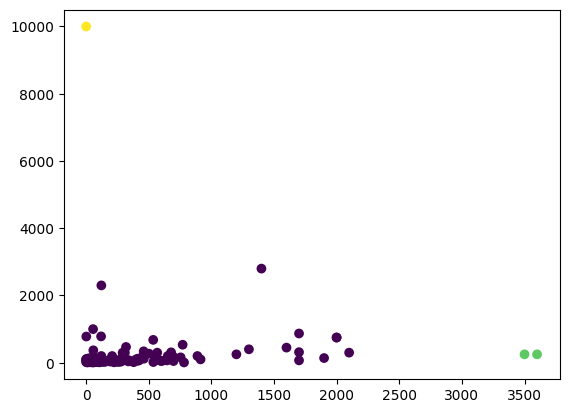

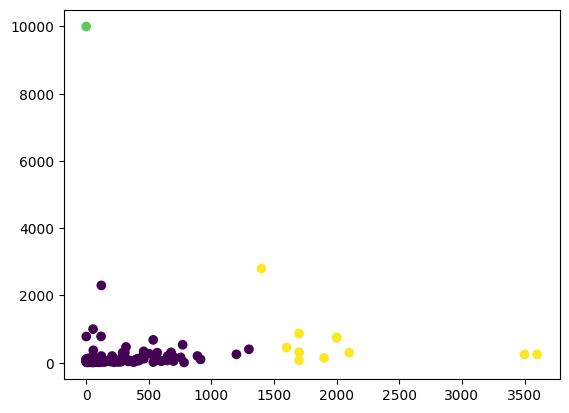

In [97]:
X_test = data_test.drop(labels = ['Company', 'Industry'], axis = 1)
y_pred_2 = kmeans2.predict(X_test)
y_pred_3 = kmeans3.predict(X_test)
y_pred_4 = kmeans4.predict(X_test)
y_pred_5 = kmeans5.predict(X_test)
y_pred_6 = kmeans6.predict(X_test)
import matplotlib.pyplot as plt
plt.xlabel('Funds_Raised')
plt.ylabel('Laid_Off_Count')
plt.scatter(X_test['Funds_Raised'],X_test['Laid_Off_Count'],c=y_pred_2)
plt.show()
plt.scatter(X_test['Funds_Raised'],X_test['Laid_Off_Count'],c=y_pred_3)
plt.show()
plt.scatter(X_test['Funds_Raised'],X_test['Laid_Off_Count'],c=y_pred_4)
plt.show()
plt.scatter(X_test['Funds_Raised'],X_test['Laid_Off_Count'],c=y_pred_5)
plt.show()
plt.scatter(X_test['Funds_Raised'],X_test['Laid_Off_Count'],c=y_pred_6)
plt.show()

#3/Decision Tree

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_text
from sklearn.tree import export_graphviz
import graphviz
data_tree = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Layoffs/Layoffs_Final_Rank.csv")
#Chọn các cột đặc trưng
features = data_tree[['Percentage', 'Funds_Raised', 'Stage', 'Country', 'Laid_Off_Count', 'Year']]
labels = data_tree['Laid_Off_Rank']
#Chuyển các cột dữ liệu từ dạng văn bản thành dạng số
features = pd.get_dummies(features)
#Tách dữ liệu thành 2 tập train và test
train_features, test_features, train_labels, test_labels = train_test_split(features,labels,test_size=0.1,random_state=42)
#Xây dựng mô hình cây quyết định
param_grid={
      'criterion':['entropy'],
      'splitter':['best','random'],
      'max_depth':[None,10,20,30],
      'min_samples_split':[2,5,10],
      'min_samples_leaf':[1,2,4]

}
#Tạo mô hình cây quyết định
clf = DecisionTreeClassifier()
#Sử dụng GridSearchCV để thử nghiệm các tham số và lựa chọn mô hình tốt nhất
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring ='accuracy')
grid_search.fit(train_features, train_labels)
#Lựa chọn mô hình tốt nhất sau khi thử nghiệm
best_clf = grid_search.best_estimator_
print("Best Parameters:",grid_search.best_params_)
print("Best Accuracy", grid_search.best_score_)
#Tạo biểu diễn đồ thị cho cây quyết định
dot_data = export_graphviz(best_clf, out_file=None, feature_names=list(train_features.columns),
                           class_names=best_clf.classes_,filled=True,rounded= True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph.render(filename="/content/drive/MyDrive/Colab Notebooks/Layoffs/layoffs-decision-tree",format='png', cleanup=True)
graph.view()

Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Best Accuracy 1.0


'/content/drive/MyDrive/Colab Notebooks/Layoffs/layoffs-decision-tree.pdf'

In [ ]:
#Dự đoán kết quả trên tạp Test bằng mô hình tốt nhất đã chọn
predictions = best_clf.predict(test_features)
#Đánh giá hiệu suất của mô hình tốt nhất trên tập Test
accuracy = accuracy_score(test_labels, predictions)
print("Accuracy on Test set: ", accuracy)

Accuracy on Test set:  1.0


In [ ]:
#Tách dữ liệu thành hai tập Train và Test
train_features, test_features, train_labels, test_labels= train_test_split(features,labels,test_size=0.1,random_state=42)
#Xây dựng mô hình cây quyết định với giới hạn độ sâu max_depth
max_depth=10
clf=DecisionTreeClassifier(max_depth=max_depth)
#Huấn luyện mô hình trên tập Train
clf.fit(train_features,train_labels)
#Dự đoán kết quả trên tập Test
predictions=clf.predict(test_features)
#Đánh giá hiệu suất của mô hình trên tập Test
accuracy=accuracy_score(test_labels,predictions)
print("Accuracy on Test set: ",accuracy)

Accuracy on Test set:  1.0
